In [1]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

### Useful functions

In [2]:
def get_entries(filename):
    file = uproot.open(filename)
    events = file['Hits']
    energy = events.array("m_energy")
    return len(energy)

## Investigate how thickness affect the light collection efficiency with different surface treatments to the scintillator 

Look into LYSO crystal so obtained result can be compared to literature

In [237]:
folder = 'rindex_1p81_dielectric-LUTDAVIS_LUT/'
model = '_DAVIS'
finishes = ['groundair', 'groundteflonair', 'groundvm2000air', 
            'polishedair', 'polishedteflonair', 'polishedvm2000air']
for finish in finishes:
    filename1 = "%sneutron_beam_25meV_1.5mm_LUT_%s.root" % (folder, finish)
    filename2 = "%sneutron_beam_25meV_2mm_LUT_%s.root" % (folder, finish)
    filename3 = "%sneutron_beam_25meV_6mm_LUT_%s.root"% (folder, finish)
    filename4 = "%sneutron_beam_25meV_20mm_LUT_%s.root"% (folder, finish)

    print("%s%s = [%d, %d, %d, %d]" % 
         (finish, model, get_entries(filename1), get_entries(filename2), 
          get_entries(filename3), get_entries(filename4))
         )

groundair_DAVIS = [182930, 295507, 198773, 89445]
groundteflonair_DAVIS = [189199, 275534, 171246, 92457]
groundvm2000air_DAVIS = [251332, 160305, 171506, 71066]
polishedair_DAVIS = [253915, 200224, 154672, 101220]
polishedteflonair_DAVIS = [186267, 190810, 146371, 78680]
polishedvm2000air_DAVIS = [207304, 186827, 167428, 80720]


In [178]:
thickness = [1.5, 2, 6, 20]

# Model: unified, Surface Type: dielectric-LUT
groundair_unified = [186170, 176775, 200395, 84749]
groundteflonair_unified = [220991, 217934, 261564, 153689]
groundvm2000air_unified = [118139, 176476, 195813, 176078]
polishedair_unified = [174323, 174289, 158864, 94565]
polishedteflonair_unified = [135303, 211967, 165753, 169142]
polishedvm2000air_unified = [188490, 218522, 231351, 177907]

# Model: LUT, Surface Type: dielectric-LUTDAVIS
groundair_DAVIS = [182930, 295507, 198773, 89445]
groundteflonair_DAVIS = [189199, 275534, 171246, 92457]
groundvm2000air_DAVIS = [251332, 160305, 171506, 71066]
polishedair_DAVIS = [253915, 200224, 154672, 101220]
polishedteflonair_DAVIS = [186267, 190810, 146371, 78680]
polishedvm2000air_DAVIS = [207304, 186827, 167428, 80720]

# Model: LUT, Surface Type: dielectric-LUT
groundair = [118850, 186049, 155795, 87303]
groundteflonair = [187650, 214496, 230275, 140367]
groundvm2000air = [232826, 204940, 249408, 158288]
polishedair = [162465, 174764, 168235, 88035]
polishedteflonair = [162147, 191903, 196923, 182703]
polishedvm2000air = [165799, 215168, 226125, 242830]

## Critical Angle

In [235]:
def critical_angle(n_i, n_t):
    rad = np.arcsin(n_t/n_i)
    return rad/np.pi*180

# n = 1.35-1.38 teflon, critical angle = 60.57 - 62.91
# n = 2.6 TiO2, critical angle = 
# n = 0.6-0.8 ESR, critical angle = 22.77 - 31.07
# n = 1.0 air, critical angle = 40.18

critical_angle(1.81, 1.5)

55.96842494093397

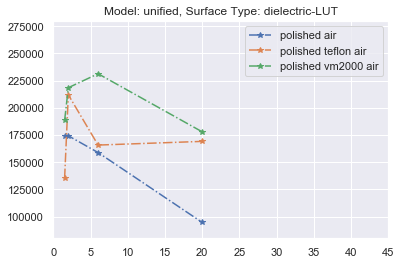

In [207]:
plt.plot(thickness, polishedair_unified, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_unified, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_unified, '-.*', label="polished vm2000 air") 
# plt.plot(thickness, groundair_unified, '-.*', label="ground air") 
# plt.plot(thickness, groundteflonair_unified, '-.*', label="ground teflon air") 
# plt.plot(thickness, groundvm2000air_unified, '-.*', label="ground vm2000 air") 
plt.title("Model: unified, Surface Type: dielectric-LUT")
plt.axis([0,45,80000,280000])
plt.legend()

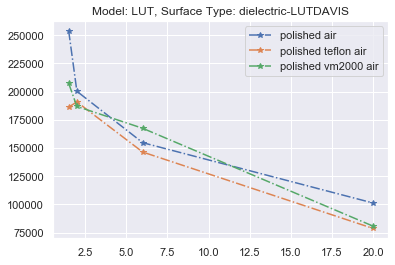

In [214]:
plt.plot(thickness, polishedair_DAVIS, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_DAVIS, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_DAVIS, '-.*', label="polished vm2000 air") 
# plt.plot(thickness, groundair_DAVIS, '-.*', label="ground air") 
# plt.plot(thickness, groundteflonair_DAVIS, '-.*', label="ground teflon air") 
# plt.plot(thickness, groundvm2000air_DAVIS, '-.*', label="ground vm2000 air") 
plt.title("Model: LUT, Surface Type: dielectric-LUTDAVIS")
plt.legend()

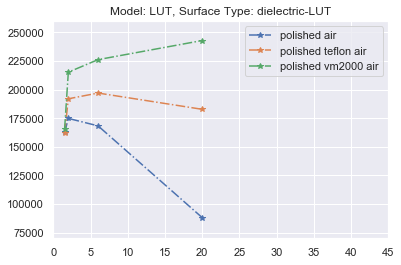

In [215]:
plt.plot(thickness, polishedair, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air, '-.*', label="polished vm2000 air") 
# plt.plot(thickness, groundair, '-.*', label="ground air") 
# plt.plot(thickness, groundteflonair, '-.*', label="ground teflon air") 
# plt.plot(thickness, groundvm2000air, '-.*', label="ground vm2000 air") 
plt.title("Model: LUT, Surface Type: dielectric-LUT")
plt.axis([0,45,70000,260000])
plt.legend()

In [147]:
filename1 = "neutron_beam_25meV_1.5mm_LUT_groundair.root"
filename2 = "neutron_beam_25meV_1.5mm_LUT_groundteflonair.root"
filename3 = "neutron_beam_25meV_1.5mm_LUT_groundvm2000air.root"

filename4 = "neutron_beam_25meV_1.5mm_LUT_polishedair.root"
filename5 = "neutron_beam_25meV_1.5mm_LUT_polishedteflonair.root"
filename6 = "neutron_beam_25meV_1.5mm_LUT_polishedvm2000air.root"


print("ground: %d, %d, %d" % 
      (get_entries(filename1), get_entries(filename2), get_entries(filename3)))
print()
print("polished: %d, %d, %d" % 
      (get_entries(filename4), get_entries(filename5), get_entries(filename6)))


ground: 186170, 220991, 118139

polished: 174323, 135303, 188490


In [148]:
r2p1_ground1mm = [137708, 218524, 165900]
r2p1_ground2mm = [160209, 211408, 189166] # rindex = 2.1
r2p1_ground6mm = [162026, 238311, 174801] # rindex = 2.1


# Investigating LYSO so can compare with literature 
r1p8_ground1mm_unified = [186170, 220991, 118139]
r1p8_ground2mm_unified = [176775, 217934, 176476]
r1p8_ground6mm_unified = [200395, 261564, 195813]
r1p8_ground20mm_unified = [84749, 153689, 176078]

r1p8_polished1mm_unified = [174323, 135303, 188490]
r1p8_polished2mm_unified = [174289, 211967, 218522]
r1p8_polished6mm_unified = [158864, 165753, 231351]
r1p8_polished20mm_unified = [94565, 169142, 1779087]

r1p8_ground1mm_DAVIS = [182930, 189199, 251332]
r1p8_ground2mm_DAVIS = [295507, 275534, 160305]
r1p8_ground6mm_DAVIS = [198773, 171246, 171506]
r1p8_ground20mm_DAVIS = [89445, 92457, 71066]

r1p8_polished1mm_DAVIS = [253915, 186267, 207304]
r1p8_polished2mm_DAVIS = [200224, 190810, 186827]
r1p8_polished6mm_DAVIS = [154672, 146371, 167428]
r1p8_polished20mm_DAVIS = [101220, 78680, 80720]

r1p8_ground1mm = [118850, 187650, 232826]
r1p8_ground2mm = [186049, 214496, 204940]
r1p8_ground6mm = [155795, 230275, 249408]
r1p8_ground20mm = [87303, 140367, 158288]

r1p8_polished1mm = [162465, 162147, 165799]
r1p8_polished2mm = [174764, 191903, 215168]
r1p8_polished6mm = [168235, 196923, 226125]
r1p8_polished20mm = [88035, 182703, 242830]

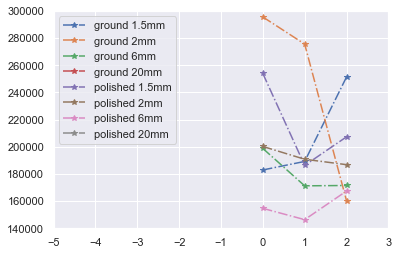

In [121]:
plt.plot(r1p8_ground1mm_DAVIS, '-.*', label='ground 1.5mm')
plt.plot(r1p8_ground2mm_DAVIS, '-.*', label='ground 2mm')
plt.plot(r1p8_ground6mm_DAVIS, '-.*', label='ground 6mm')
plt.plot(r1p8_ground20mm_DAVIS, '-.*', label='ground 20mm')
plt.plot(r1p8_polished1mm_DAVIS, '-.*', label='polished 1.5mm')
plt.plot(r1p8_polished2mm_DAVIS, '-.*', label='polished 2mm')
plt.plot(r1p8_polished6mm_DAVIS, '-.*', label='polished 6mm')
plt.plot(r1p8_polished20mm_DAVIS, '-.*', label='polished 20mm')
plt.axis([-5,3,140000,300000])
plt.legend()

Conclusion: (refractive index of 1.81, dielectric-LUT_DAVIS, LUT model)
1. having reflector doesn't help light collection in general (doesn't make sense...
2. ESR and teflon don't have consistent performance 

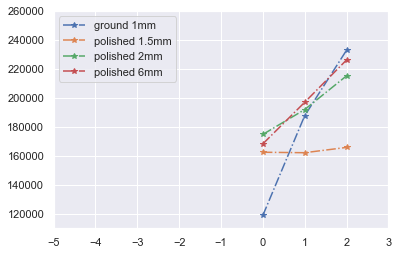

In [110]:
plt.plot(r1p8_ground1mm, '-.*', label='ground 1mm')
# plt.plot(r1p8_ground2mm, '-.*', label='ground 2mm')
# plt.plot(r1p8_ground6mm, '-.*', label='ground 6mm')
plt.plot(r1p8_polished1mm, '-.*', label='polished 1.5mm')
plt.plot(r1p8_polished2mm, '-.*', label='polished 2mm')
plt.plot(r1p8_polished6mm, '-.*', label='polished 6mm')
plt.axis([-5,3,110000,260000])
plt.legend()

Conclusions: (reflective index of 1.81, dielectric-LUT, LUT model) 
1. having reflectors allows a higher light collection efficiency
2. ESR (specular) seems to outperform teflon (lambertian)

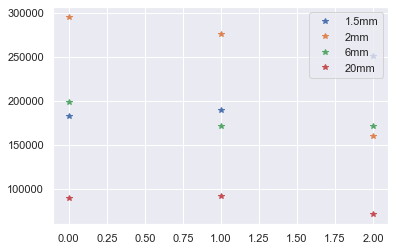

In [29]:
plt.plot(groundESR1mm, '*', label='1.5mm')
plt.plot(groundESR2mm, '*', label='2mm')
plt.plot(groundESR6mm, '*', label='6mm')
plt.plot(groundESR20mm, '*', label='20mm')
plt.legend()

In [2]:
def generate_data(folder,filename,x_position,y_position,z_position,counts):
    x,y,z = np.array(filename.split('_')[2:5]).astype(float)
    x_position.append(x)
    y_position.append(y)
    z_position.append(z)
    file = uproot.open(folder + filename)
    events = file['Hits']
    energy = events.array("m_energy")
    counts.append(len(energy))
    
folder = 'groundair/'
filename = 'opticalphoton_3eV_0.75_-0.25_-0.75_LUT_groundair.root'
x,y,z = np.array(filename.split('_')[2:5]).astype(float)
file = uproot.open(folder + filename)
events = file['Hits']
energy = events.array("m_energy")
len(energy)

8928

In [72]:
# folder = '/Users/suannchong/Documents/results/opticalphoton_positions/groundair/'
folder = '/Users/suannchong/Desktop/Geant4/mpnd_suann/build/results/groundair/'
directory = os.fsencode(folder)

x_position = []
y_position = []
z_position = []
counts = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".root"):
        generate_data(folder,filename,x_position,y_position,z_position,counts)
#         print(filename)
    else:
        continue
        
data = {'x':x_position, 'y':y_position, 'z':z_position, 'counts':counts}
df = pd.DataFrame(data).sort_values(by=['x', 'y', 'z'])

       x    y     z  counts
174  0.0  0.0 -0.75    9436
314  0.0  0.0 -0.50    9452
112  0.0  0.0 -0.25    9403
321  0.0  0.0  0.00    9402
316  0.0  0.0  0.25    9437
58   0.0  0.0  0.50    9445
272  0.0  0.0  0.75    9407


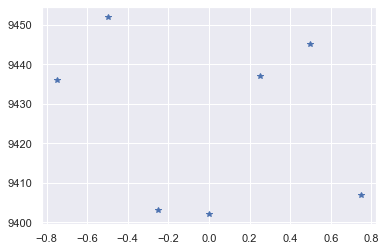

In [73]:
df_x = df[df['x'] == 0.0]
df_y = df_x[df_x['y'] == 0.0]
print(df_y)

plt.plot(df_y['z'], df_y['counts'],'*')

        x     y     z  counts
100 -0.75 -0.75 -0.75    9462
283 -0.75 -0.75 -0.50    9423
148 -0.75 -0.75 -0.25    9459
290 -0.75 -0.75  0.00    9398
291 -0.75 -0.75  0.25    9445
162 -0.75 -0.75  0.50    9464
320 -0.75 -0.75  0.75    9415


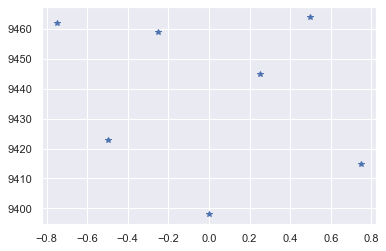

In [74]:
df_x = df[df['x'] == -0.75]
df_y = df_x[df_x['y'] == -0.75]
print(df_y)

plt.plot(df_y['z'], df_y['counts'],'*')

Text(0, 0.5, 'Frequency')

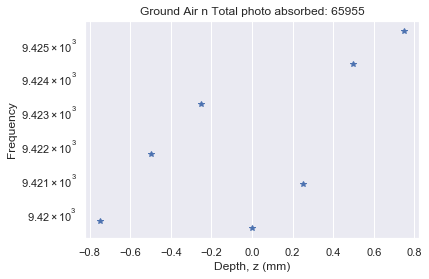

In [75]:
c = df.groupby(['z']).mean()['counts']
total = sum(c)
plt.semilogy(c, '*')
plt.title('Ground Air n Total photo absorbed: %d' %total)
plt.xlabel('Depth, z (mm)')
plt.ylabel('Frequency')

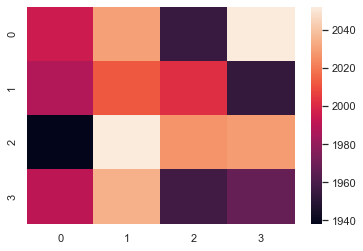

In [57]:
data = np.array([[1995,2030,1955,2052],[1988,2012,2002,1954],[1938,2052,2027,2029],[1991,2035,1958,1968]])
sns.heatmap(data)

In [12]:
layer1 = df[df['z'] == -0.75]
layer2 = df[df['z'] == -0.25]
layer3 = df[df['z'] == 0.25]
layer4 = df[df['z'] == 0.75]

In [26]:
x = layer1['x']
y = layer1['y']
c = layer1['counts']
layer1[layer1['x'] == -0.25].sort_values(by=['y'])

,x,y,z,counts
14,-0.25,-0.75,-0.75,2109
9,-0.25,-0.25,-0.75,1966
56,-0.25,0.25,-0.75,1962
61,-0.25,0.75,-0.75,2003


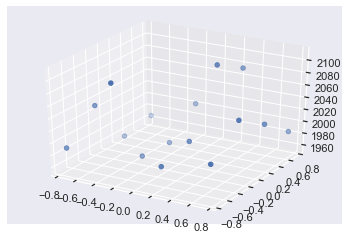

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,c)

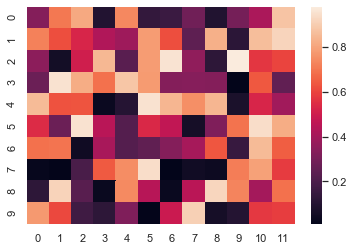

In [17]:
uniform_data = np.random.rand(10,12)
sns.heatmap(uniform_data)

In [36]:
69964/70000

0.9994857142857143

In [37]:
69586/70000

0.9940857142857142

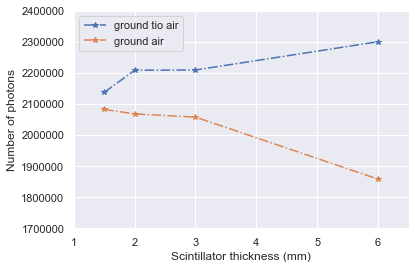

In [10]:
polishedtioair = [2210324, 2378973, 2313028, 2143013]
polishedair = [2201299, 2135792, 2026096, 1758177]
groundtioair = [2137238, 2208666, 2209484, 2300489]
groundair = [2082693, 2068034, 2057787, 1858207]
thickness = [1.5, 2, 3, 6]

# plt.plot(thickness, polishedtioair, '-.*', label="polished tio air")
# plt.plot(thickness, polishedair, '-.*', label="polished  air")
plt.plot(thickness, groundtioair, '-.*', label="ground tio air")
plt.plot(thickness, groundair, '-.*', label="ground air")
plt.xlabel("Scintillator thickness (mm)")
plt.ylabel("Number of photons")
plt.axis([1,6.5,1700000,2400000])
plt.legend()

## Refractive Index of VM2000


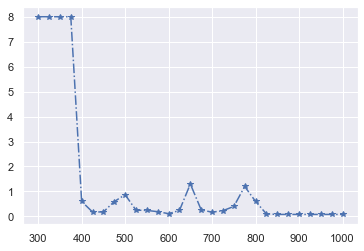

In [200]:
wavelength = [300,   325,   350,   375,   400,   425,   450,   475,   500,   525,
    550,   575,   600,   625,   650,   675,   700,   725,   750,   775,
    800,   825,   850,   875,   900,   925,   950,   975,  1000]

refractive_index = [ 8.0,   8.0,   8.0,   8.0,   0.6, 0.178,  0.18, 0.595,  0.87,  0.25,
    0.24,  0.19,  0.11,  0.24,   1.3,  0.26,  0.17,  0.23,  0.40,   1.2,
    0.6,   0.1,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08]

plt.plot(wavelength, refractive_index, '-.*')

In [201]:
critical_angle(1.55, 0.6)

22.773972400659893

## Reading data (optical photons)

In [5]:
folder = ''
model = '_DAVIS'
finishes = ['groundair', 'groundteflonair', 'groundvm2000air', 
            'polishedair', 'polishedteflonair', 'polishedvm2000air']
for finish in finishes:
    filename1 = "%soptical_photon_2.5eV_1.5mm_LUT_%s.root" % (folder, finish)
    filename2 = "%soptical_photon_2.5eV_2mm_LUT_%s.root" % (folder, finish)
    filename3 = "%soptical_photon_2.5eV_6mm_LUT_%s.root"% (folder, finish)
    filename4 = "%soptical_photon_2.5eV_20mm_LUT_%s.root"% (folder, finish)

    print("%s%s = [%d, %d, %d, %d]" % 
         (finish, model, get_entries(filename1), get_entries(filename2), 
          get_entries(filename3), get_entries(filename4))
         )

groundair_DAVIS = [4141, 3531, 2196, 817]
groundteflonair_DAVIS = [7982, 8410, 6997, 3927]
groundvm2000air_DAVIS = [7908, 8065, 6696, 3891]
polishedair_DAVIS = [4112, 3345, 2830, 1637]
polishedteflonair_DAVIS = [4699, 4022, 3327, 2136]
polishedvm2000air_DAVIS = [4622, 3965, 3333, 2065]


## BGO simulation (optical photons only)

In [12]:
thickness = [1.5, 2, 6, 20]
groundair_unified = [8032, 8882, 7890, 4571]
groundteflonair_unified = [8546, 9756, 9178, 6685]
groundvm2000air_unified = [8615, 9748, 9075, 6516]
polishedair_unified = [8034, 8952, 7857, 4562]
polishedteflonair_unified = [7335, 8175, 8434, 8180]
polishedvm2000air_unified = [7299, 8110, 8274, 7794]

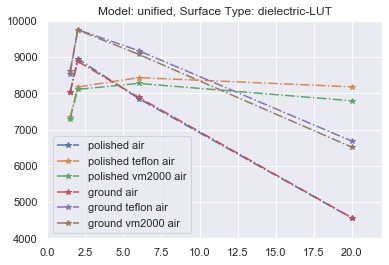

In [13]:
plt.plot(thickness, polishedair_unified, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_unified, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_unified, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_unified, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_unified, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_unified, '-.*', label="ground vm2000 air") 
plt.title("Model: unified, Surface Type: dielectric-LUT")
plt.axis([0,22,4000,10000])
plt.legend()

In [108]:
# BGO using unified model and sigmaalpha value from Janecek 2010
# groundair_LUT = [4288, 3812, 3043, 2074]
# groundteflonair_LUT = [8692, 9283, 8953, 8115]
# groundvm2000air_LUT = [8776, 9479, 9137, 8541]
# polishedair_LUT = [3229, 2313, 2252, 2234]
# polishedteflonair_LUT = [5884, 5463, 5045, 4481]
# polishedvm2000air_LUT = [5946, 5719, 5452, 4962]

groundair_LUT = [8411, 8997, 7873, 4540]
groundteflonair_LUT = [8992, 9758, 9218, 6924]
groundvm2000air_LUT = [9025, 9762, 9107, 6583]
polishedair_LUT = [8434, 9011, 7928, 4563]
polishedteflonair_LUT = [7792, 8378, 8497, 8308]
polishedvm2000air_LUT = [7710, 8233, 8384, 7958]

def normalize(data):
    return [i/10000 for i in data]

groundair_LUT = normalize(groundair_LUT)
groundteflonair_LUT = normalize(groundteflonair_LUT)
groundvm2000air_LUT = normalize(groundvm2000air_LUT)
polishedair_LUT = normalize(polishedair_LUT)
polishedteflonair_LUT = normalize(polishedteflonair_LUT)
polishedvm2000air_LUT = normalize(polishedvm2000air_LUT)



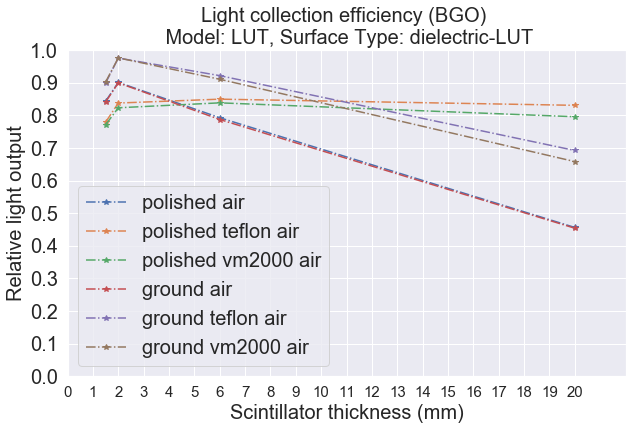

In [120]:
plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_LUT, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_LUT, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_LUT, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_LUT, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_LUT, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_LUT, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (BGO) \n Model: LUT, Surface Type: dielectric-LUT", fontsize=20)
plt.axis([0,22,0,1])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
plt.xticks(np.arange(0.,21.,1), fontsize=15)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

## GS20 (optical photons)

In [7]:
thickness = [1.5, 2, 6, 20]
groundair_unified = [4275, 3625, 2499, 1474]
groundteflonair_unified = [8879, 9571, 8754, 6737]
groundvm2000air_unified = [8909, 9624, 9278, 8514]
polishedair_unified = [4631, 4245, 3598, 2979]
polishedteflonair_unified = [8919, 9601, 8502, 5152]
polishedvm2000air_unified = [8020, 8312, 7834, 7029]

def normalize(data):
    return [i/10000 for i in data]

groundair_unified = normalize(groundair_unified)
groundteflonair_unified = normalize(groundteflonair_unified)
groundvm2000air_unified = normalize(groundvm2000air_unified)
polishedair_unified = normalize(polishedair_unified)
polishedteflonair_unified = normalize(polishedteflonair_unified)
polishedvm2000air_unified = normalize(polishedvm2000air_unified)

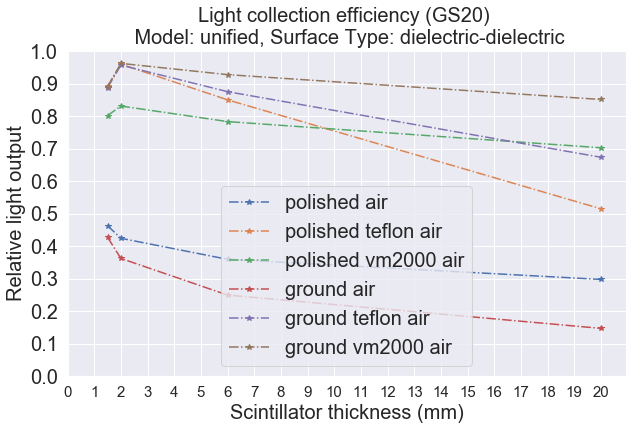

In [114]:
plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_unified, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_unified, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_unified, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_unified, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_unified, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_unified, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (GS20) \n Model: unified, Surface Type: dielectric-dielectric", fontsize=20)
# plt.axis([0,22,0,1])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
plt.xticks(np.arange(0.,21.,1), fontsize=15)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

## LYSO (optical photons)

In [12]:
thickness = [1.5, 2, 6, 20]
groundair_DAVIS = [4213, 3513, 2233, 764]
groundteflonair_DAVIS = [8014, 8425, 6926, 3799]
groundvm2000air_DAVIS = [7902, 8237, 6670, 3828]
polishedair_DAVIS = [4069, 3337, 2776, 1752]
polishedteflonair_DAVIS = [4595, 3992, 3405, 2086]
polishedvm2000air_DAVIS = [4710, 3954, 3431, 2082]

# groundair_DAVIS = [4141, 3531, 2196, 817]
# groundteflonair_DAVIS = [7982, 8410, 6997, 3927]
# groundvm2000air_DAVIS = [7908, 8065, 6696, 3891]
# polishedair_DAVIS = [4112, 3345, 2830, 1637]
# polishedteflonair_DAVIS = [4699, 4022, 3327, 2136]
# polishedvm2000air_DAVIS = [4622, 3965, 3333, 2065]

groundair_DAVIS = normalize(groundair_DAVIS)
groundteflonair_DAVIS = normalize(groundteflonair_DAVIS)
groundvm2000air_DAVIS = normalize(groundvm2000air_DAVIS)
polishedair_DAVIS = normalize(polishedair_DAVIS)
polishedteflonair_DAVIS = normalize(polishedteflonair_DAVIS)
polishedvm2000air_DAVIS = normalize(polishedvm2000air_DAVIS)

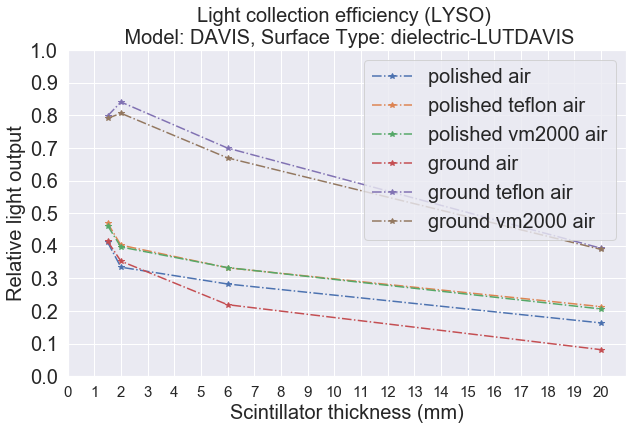

In [11]:
plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_DAVIS, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_DAVIS, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_DAVIS, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_DAVIS, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_DAVIS, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_DAVIS, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (LYSO) \n Model: DAVIS, Surface Type: dielectric-LUTDAVIS", fontsize=20)
# plt.axis([0,22,0,1])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
plt.xticks(np.arange(0.,21.,1), fontsize=15)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)

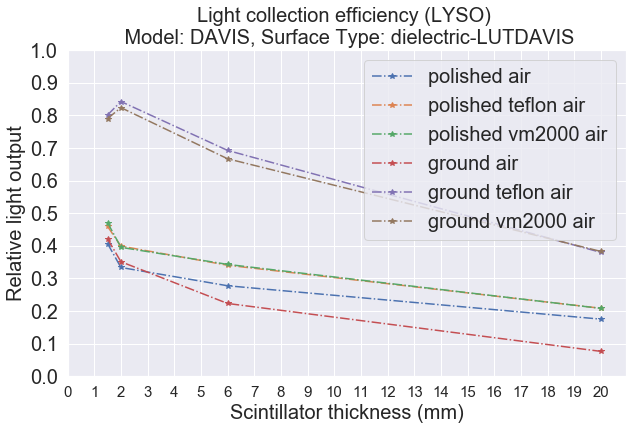

In [13]:
plt.figure(figsize=[10,6])
plt.plot(thickness, polishedair_DAVIS, '-.*', label="polished air") 
plt.plot(thickness, polishedteflonair_DAVIS, '-.*', label="polished teflon air") 
plt.plot(thickness, polishedvm2000air_DAVIS, '-.*', label="polished vm2000 air") 
plt.plot(thickness, groundair_DAVIS, '-.*', label="ground air") 
plt.plot(thickness, groundteflonair_DAVIS, '-.*', label="ground teflon air") 
plt.plot(thickness, groundvm2000air_DAVIS, '-.*', label="ground vm2000 air") 
plt.title("Light collection efficiency (LYSO) \n Model: DAVIS, Surface Type: dielectric-LUTDAVIS", fontsize=20)
# plt.axis([0,22,0,1])
plt.xlabel("Scintillator thickness (mm)", fontsize=20)
plt.ylabel("Relative light output", fontsize=20)
plt.xticks(np.arange(0.,21.,1), fontsize=15)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.legend( fontsize=20)